In [2]:
%matplotlib inline

from IPython.display import Image

import numpy as np

from qutip import *
from qutip.qip import *



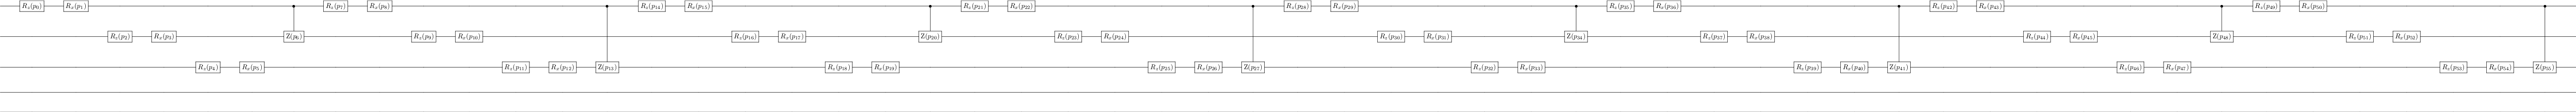

In [3]:
#encoding
n = 4 #no of repititions of block
paramz = [[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(n)]
paramx = [[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(n)]
paramcs = [[np.random.uniform(0,4*np.pi) for i in range(2)] for j in range(n)]
q = QubitCircuit(5,reverse_states = False)
param_count = 0

for j in range(n):
    for i in range(3):
        q.add_gate("RZ", targets = i, arg_value = paramz[j][i], arg_label = r'p_{%d}'%(param_count))
        param_count += 1
        q.add_gate("RX", targets = i, arg_value = paramx[j][i], arg_label = r'p_{%d}'%(param_count))
        param_count += 1
    q.add_gate("CSIGN", controls = [0],targets = [1], arg_value = paramcs[j][0],arg_label = r'p_{%d}'%(param_count))
    param_count += 1
    for i in range(3):
        q.add_gate("RZ", targets = i, arg_value = paramz[j][3 + i], arg_label = r'p_{%d}'%(param_count))
        param_count += 1
        q.add_gate("RX", targets = i, arg_value = paramx[j][3 + i], arg_label = r'p_{%d}'%(param_count))
        param_count += 1
    q.add_gate("CSIGN", controls = [0],targets = [2], arg_value = paramcs[j][1],arg_label = r'p_{%d}'%(param_count))
    param_count += 1

q.png

In [3]:
U_list0 = q.propagators()
U0 = gate_sequence_product(U_list0)
U0

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = False
Qobj data =
[[ 0.00230115+0.19578991j  0.        +0.j          0.        +0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.00230115+0.19578991j  0.        +0.j
  ... -0.29721456+0.24248312j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.00230115+0.19578991j
  ...  0.        +0.j         -0.29721456+0.24248312j
   0.        +0.j        ]
 ...
 [ 0.        +0.j         -0.35258037+0.10085158j  0.        +0.j
  ...  0.09372797+0.16795844j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.35258037+0.10085158j
  ...  0.        +0.j          0.09372797+0.16795844j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ...  0.        +0.j          0.        +0.j
   0.09372797+0.16795844j]]

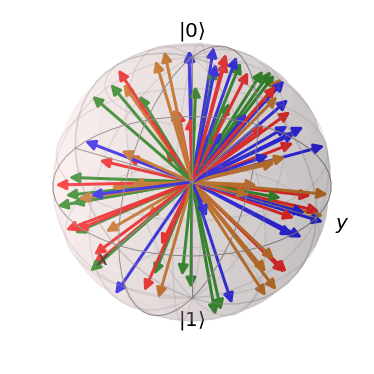

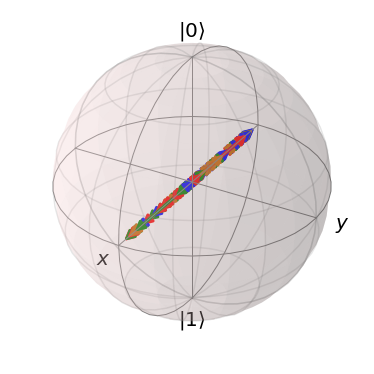

In [4]:
#bitflip error 
p = 0.5
I, X = qeye(2),sigmax()
dm1_list  = [ket2dm(rand_ket_haar(2)) for i in range(100)]
dm2_list = [(1-p)*dm1 + p*X*dm1*X for dm1 in dm1_list]
b1 = Bloch()
b1.add_states(dm1_list)
b1.show()
b2 = Bloch()
b2.add_states(dm2_list)
b2.show()


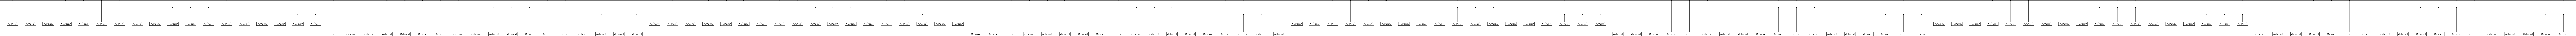

In [36]:
#syndrome extraction
n = 4

paramx = [[[np.random.uniform(0,4*np.pi) for i in range(3)] for j in range(2)] for k in range(n)]
paramy = [[[np.random.uniform(0,4*np.pi) for i in range(3)] for j in range(2)] for k in range(n)]
paramz = [[[np.random.uniform(0,4*np.pi) for i in range(3)] for j in range(2)] for k in range(n)]

paramcx = [[[np.random.uniform(0,4*np.pi) for i in range(3)] for j in range(2)] for k in range(n)]
paramcy = [[[np.random.uniform(0,4*np.pi) for i in range(3)] for j in range(2)] for k in range(n)]
paramcz = [[[np.random.uniform(0,4*np.pi) for i in range(3)] for j in range(2)] for k in range(n)]

q2 = QubitCircuit(5,reverse_states = False)

for k in range(n):
    for j in range(2):
        for i in range(3):
            q2.add_gate('RX', targets = 3 + j ,arg_value = paramx[k][j][i], arg_label = r'p_{%d}'%(param_count))
            param_count += 1
            q2.add_gate('RY', targets = 3 + j ,arg_value = paramy[k][j][i], arg_label = r'p_{%d}'%(param_count))
            param_count += 1
            q2.add_gate('RZ', targets = 3 + j ,arg_value = paramz[k][j][i], arg_label = r'p_{%d}'%(param_count))
            param_count += 1
            q2.add_gate("CRX", controls = i ,targets = 3 + j, arg_value = paramcx[k][j][i], arg_label = r'p_{%d}'%(param_count))
            param_count += 1
            q2.add_gate("CRY", controls = i ,targets = 3 + j, arg_value = paramcy[k][j][i], arg_label = r'p_{%d}'%(param_count))
            param_count += 1
            q2.add_gate("CRZ", controls = i ,targets = 3 + j, arg_value = paramcz[k][j][i], arg_label = r'p_{%d}'%(param_count))
            param_count += 1

q2.png

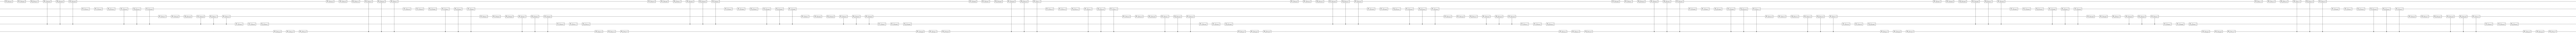

In [35]:
#recovery
n = 4

paramz  = [[[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(2)] for k in range(n)]
paramx  = [[[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(2)] for k in range(n)]
paramy  = [[[np.random.uniform(0,4*np.pi) for i in range(6)] for j in range(2)] for k in range(n)]

paramcz = [[[np.random.uniform(0,4*np.pi) for i in range(3)] for j in range(2)] for k in range(n)]
paramcx = [[[np.random.uniform(0,4*np.pi) for i in range(3)] for j in range(2)] for k in range(n)]
paramcy = [[[np.random.uniform(0,4*np.pi) for i in range(3)] for j in range(2)] for k in range(n)]
q3 = QubitCircuit(5,reverse_states = False)

for k in range(n):
    for j in range(2):
        for i in range(6):
            q3.add_gate("RZ", targets = i, arg_value = paramz[k][j][i], arg_label = r'p_{%d}'%(param_count))
            param_count += 1
            q3.add_gate("RX", targets = i, arg_value = paramx[k][j][i], arg_label = r'p_{%d}'%(param_count))
            param_count += 1
            q3.add_gate("RY", targets = i, arg_value = paramy[k][j][i], arg_label = r'p_{%d}'%(param_count))
            param_count += 1
            if(i < 3):
                q3.add_gate("CRX", controls = j + 3 ,targets = i, arg_value = paramcx[k][j][i], arg_label = r'p_{%d}'%(param_count))
                param_count += 1
                q3.add_gate("CRY", controls = j + 3 ,targets = i, arg_value = paramcy[k][j][i], arg_label = r'p_{%d}'%(param_count))
                param_count += 1
                q3.add_gate("CRZ", controls = j + 3 ,targets = i, arg_value = paramcz[k][j][i], arg_label = r'p_{%d}'%(param_count))
                param_count += 1

q3.png